In [3]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
sys.path.insert(0,os.path.expanduser("~/git/machine_learning/src"))

2023-07-13 11:59:28.062180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs4_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs4_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs4_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=10000

refl= np.asarray(refl[:-nset])
pars= np.asarray (pars[:-nset])

testset= np.asarray(refl[-nset:])
testpars = np.asarray (pars[-nset:])

(1000000,)
(1000000, 100)
(100,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(refl, pars)

pred_class = neigh.predict(testset)
prob_class = neigh.predict_proba(testset)

In [6]:
testpars = np.load(os.path.join(data_dir, "orhs4-pars_pars.npy"))
testset = np.load(os.path.join(data_dir, "orhs4-pars_data.npy"))
print(testpars.shape)

(4000000, 13)


In [8]:
pred_class = neigh.predict(testset[:10000])
prob_class = neigh.predict_proba(testset[:10000])

In [24]:
pred_class=neigh.predict(idx_realgood[:1000])

In [9]:
testpars=np.ones(10000)*4
accuracy_knn=models.accuracy(testpars, pred_class)

[0, 0, 0, 0]
Layer Accuracy : nan
[0, 0, 0, 0]
Layer Accuracy : nan
[0, 0, 0, 0]
Layer Accuracy : nan
[1219, 3384, 2892, 2505]
Layer Accuracy : 0.2505
Accuracy: 0.2505


/SNS/users/imeliamb/git/machine_learning/src/models.py:151: RuntimeWarning: invalid value encountered in long_scalars
  print("Layer Accuracy : %g" % (k/f))


In [22]:

idx_realgood=[]
for i in range(len(testset)-1):
    if testpars[i,4]>-abs(0.5):
        idx_realgood.append(testset[i])

idx_realgood=np.asarray(idx_realgood)

print(idx_realgood)


[[ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.55074487e+00
  -3.52549500e+00 -3.50024501e+00]
 [ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.55067968e+00
  -3.52546753e+00 -3.50023172e+00]
 [ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.52452517e+00
  -3.50568659e+00 -3.48442675e+00]
 ...
 [ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.55074514e+00
  -3.52549510e+00 -3.50024505e+00]
 [ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.55059259e+00
  -3.52539416e+00 -3.50019872e+00]
 [ 4.34294265e-07  2.52504843e-02  5.05005342e-02 ... -3.55023440e+00
  -3.52500681e+00 -3.50007350e+00]]


In [8]:

idx_good = pred_class==4
#use this to limit parameter idx=4 
idx_bad = pred_class!=4

print(testpars[:10000][idx_good].shape)
print(testpars[:10000][idx_bad].shape)
print(testpars[:10000][idx_good][0])

(2802,)
(7198,)
4.0


(990000,)
(2802, 13)


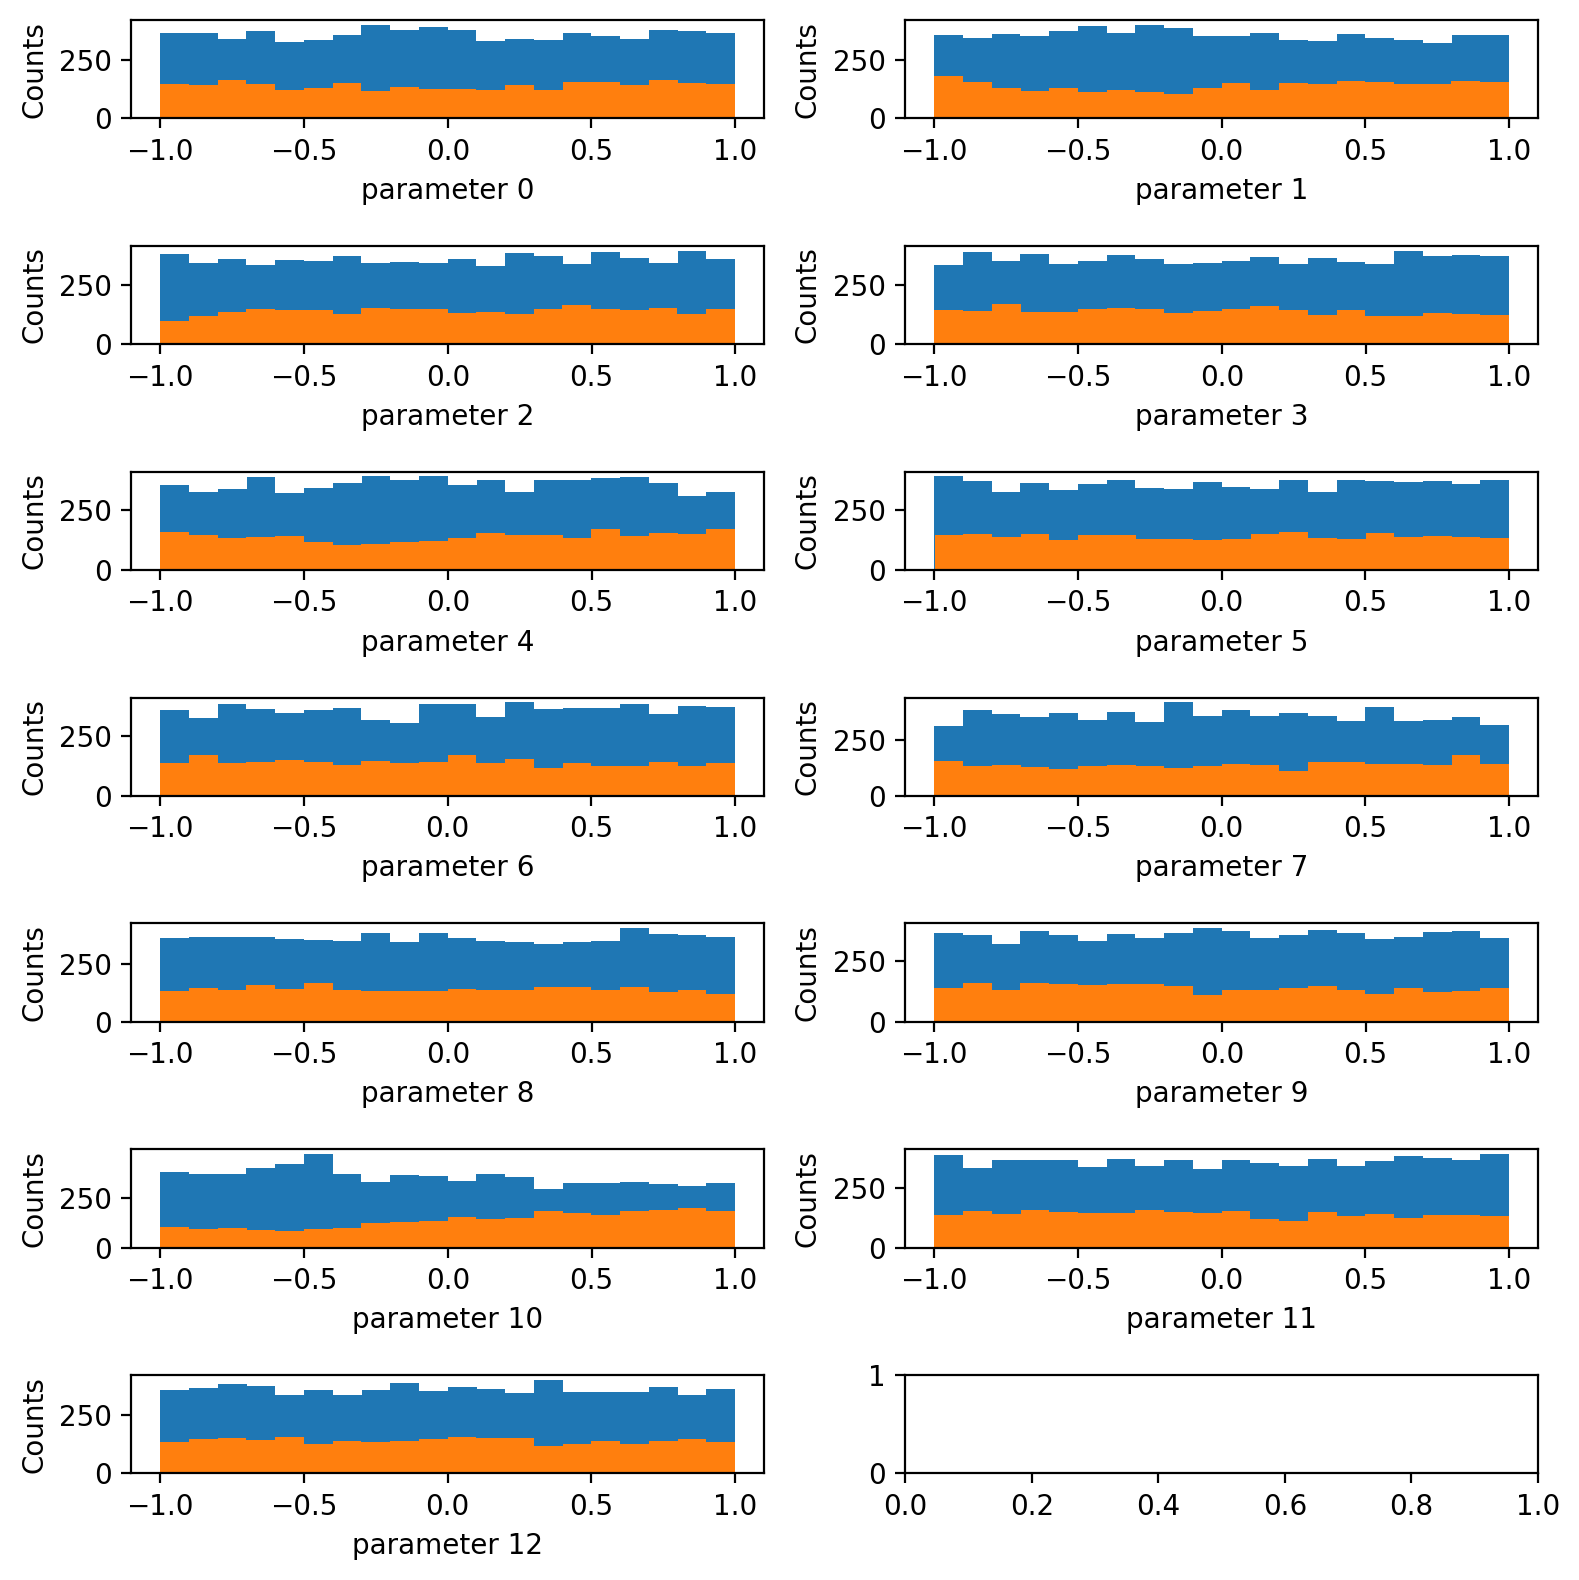

In [12]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(7,2, sharey=False, tight_layout= True, dpi=200, figsize= (8,8))
print(testpars[:10000][idx_good].shape)
true_values=testpars[:10000][idx_good].T

bad_values=testpars[:10000][idx_bad].T



for i in range(13):
    ax=plt.subplot(7, 2, i+1)
    ax.hist(bad_values[i], bins=20)

    ax.hist(true_values[i], bins=20)

    plt.ylabel('Counts')
    plt.xlabel('parameter %s' % i)
